In [4]:
# Initial imports for Sentiment Analysis
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initial imports for Natural Language Processing
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

# Initial imports for NGrams and Frequency Analysis
from collections import Counter
from nltk import ngrams

# Initial imports for Word Clouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl

# Initial imports for Named Entity Recognition
import spacy
from spacy import displacy

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()
%matplotlib inline


Bad key text.latex.preview in file C:\Users\gregg\Anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\gregg\Anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\gregg\Anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, 

In [5]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [6]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [7]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q="bitcoin", language="en")

In [8]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q="ethereum", language="en")

In [9]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu})
        
    except AttributeError:
        pass

# Creating a DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
# Reordering DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head()

Compound  Negative  Neutral  Positive  \
0    0.5859     0.000    0.876     0.124   
1    0.3182     0.000    0.895     0.105   
2   -0.3182     0.084    0.871     0.045   
3   -0.7096     0.169    0.831     0.000   
4    0.6808     0.000    0.815     0.185   

                                                text  
0  Even if you arent paying attention to Bitcoin ...  
1  El Salvador introduced Bitcoin as a legal tend...  
2  Israeli national Tal Prihar pled guilty to rou...  
3  Netflix\r\n is making a docuseries about one o...  
4  British entrepreneur and financier Richard ODe...

In [10]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu})
        
    except AttributeError:
        pass
    
# Creating a DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)
# Reordering DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
ethereum_df = ethereum_df[cols]
ethereum_df.head()

Compound  Negative  Neutral  Positive  \
0   -0.2023     0.062    0.899     0.039   
1   -0.2498     0.059    0.941     0.000   
2    0.0000     0.000    1.000     0.000   
3    0.0000     0.000    1.000     0.000   
4   -0.1027     0.036    0.964     0.000   

                                                text  
0  If people who buy cryptocurrencies intended on...  
1  Technical analysis isnt a perfect tool, but it...  
2  This enables an L1 platform to bootstrap its n...  
3  The means-and-ends moralists, or non-doers, al...  
4  People in Colorado will be able to pay their s...

In [11]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

Compound   Negative    Neutral   Positive
count  20.00000  20.000000  20.000000  20.000000
mean    0.13215   0.046500   0.866700   0.086800
std     0.48400   0.057772   0.060835   0.062407
min    -0.70960   0.000000   0.729000   0.000000
25%    -0.30155   0.000000   0.834750   0.043500
50%     0.26160   0.000000   0.873500   0.085500
75%     0.58590   0.090250   0.899750   0.145250
max     0.77830   0.169000   1.000000   0.185000

In [12]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

Compound   Negative    Neutral   Positive
count  20.000000  20.000000  20.000000  20.000000
mean    0.131905   0.031550   0.900300   0.068200
std     0.374249   0.048083   0.095821   0.079142
min    -0.680800   0.000000   0.723000   0.000000
25%    -0.025675   0.000000   0.812250   0.000000
50%     0.000000   0.000000   0.940000   0.048500
75%     0.302200   0.059250   1.000000   0.123500
max     0.836900   0.174000   1.000000   0.234000

Questions:
Q: Which coin had the highest mean positive score?

A: **Bitcoin -0.088800**

Q: Which coin had the highest compound score?

A: **Ethereum - 0.834100**

Q. Which coin had the highest positive score?

A: **Ethereum - 0.234000**



2. Natural Language Processing

Tokenizer
In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:

Lowercase each word.
Remove Punctuation.
Remove Stopwords.

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
nltk.download('stopwords')
sw = stopwords.words("english")

# Expand the default stopwords list if necessary
sw.append("seen")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gregg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    text_clean = regex.sub(' ', text)    
   
    # Create a tokenized list of the words
    words = word_tokenize(text_clean)
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase    
    words = [word.lower() for word in words]
    
    # Remove the stop words
    words = [word for word in words if word not in sw]    
    
    return tokens

In [15]:
# Download required nltk data
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gregg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gregg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df["text"].apply(tokenizer)

# Alternate to the above line
# bitcoin_df['tokens'] = [tokenizer(text) for text in bitcoin_df['text']]

bitcoin_df.head()

Compound  Negative  Neutral  Positive  \
0    0.5859     0.000    0.876     0.124   
1    0.3182     0.000    0.895     0.105   
2   -0.3182     0.084    0.871     0.045   
3   -0.7096     0.169    0.831     0.000   
4    0.6808     0.000    0.815     0.185   

                                                text  \
0  Even if you arent paying attention to Bitcoin ...   
1  El Salvador introduced Bitcoin as a legal tend...   
2  Israeli national Tal Prihar pled guilty to rou...   
3  Netflix\r\n is making a docuseries about one o...   
4  British entrepreneur and financier Richard ODe...   

                                              tokens  
0  [Even, if, you, arent, paying, attention, to, ...  
1  [El, Salvador, introduced, Bitcoin, a, a, lega...  
2  [Israeli, national, Tal, Prihar, pled, guilty,...  
3  [Netflix, is, making, a, docuseries, about, on...  
4  [British, entrepreneur, and, financier, Richar...

In [17]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df["text"].apply(tokenizer)

# Alternate to the above line
# ethereum_df['tokens'] = [tokenizer(text) for text in ethereum_df['text']]

ethereum_df.head()

Compound  Negative  Neutral  Positive  \
0   -0.2023     0.062    0.899     0.039   
1   -0.2498     0.059    0.941     0.000   
2    0.0000     0.000    1.000     0.000   
3    0.0000     0.000    1.000     0.000   
4   -0.1027     0.036    0.964     0.000   

                                                text  \
0  If people who buy cryptocurrencies intended on...   
1  Technical analysis isnt a perfect tool, but it...   
2  This enables an L1 platform to bootstrap its n...   
3  The means-and-ends moralists, or non-doers, al...   
4  People in Colorado will be able to pay their s...   

                                              tokens  
0  [If, people, who, buy, cryptocurrencies, inten...  
1  [Technical, analysis, isnt, a, perfect, tool, ...  
2  [This, enables, an, L, platform, to, bootstrap...  
3  [The, mean, and, end, moralist, or, non, doer,...  
4  [People, in, Colorado, will, be, able, to, pay...

NGrams and Frequency Analysis
In this section you will look at the ngrams and word frequency for each coin.

Use NLTK to produce the n-grams for N = 2.
List the top 10 words for each coin.

In [18]:
# Generate the Bitcoin N-grams where N=2
bitcoin_text = ' '.join(bitcoin_df['text'])
bitcoin_tokenized = tokenizer(bitcoin_text)
bitcoin_tokenized = [word.lower() for word in bitcoin_tokenized if word.lower() not in sw]
bigrams = ngrams(bitcoin_tokenized, n=2)
Counter(bigrams).most_common(20)

[(('el', 'salvador'), 3),
 (('illustration', 'alex'), 3),
 (('alex', 'castro'), 3),
 (('castro', 'verge'), 3),
 (('char', 'feb'), 3),
 (('feb', 'reuters'), 3),
 (('reuters', 'bitcoin'), 3),
 (('alongside', 'us'), 2),
 (('us', 'dollar'), 2),
 (('international', 'monetary'), 2),
 (('monetary', 'fund'), 2),
 (('mr', 'lichtensteins'), 2),
 (('lichtensteins', 'wallet'), 2),
 (('even', 'arent'), 1),
 (('arent', 'paying'), 1),
 (('paying', 'attention'), 1),
 (('attention', 'bitcoin'), 1),
 (('bitcoin', 'cryptocurrencies'), 1),
 (('cryptocurrencies', 'might'), 1),
 (('might', 'noticed'), 1)]

In [19]:
# Generate the Ethereum N-grams where N=2
ethereum_text = ' '.join(ethereum_df['text'])
ethereum_tokenized = tokenizer(ethereum_text)
ethereum_tokenized = [word.lower() for word in ethereum_tokenized if word.lower() not in sw]
bigrams = ngrams(ethereum_tokenized, n=2)
Counter(bigrams).most_common(20)

[(('char', 'feb'), 4),
 (('feb', 'reuters'), 4),
 (('char', 'online'), 3),
 (('profile', 'picture'), 2),
 (('online', 'thief'), 2),
 (('thief', 'made'), 2),
 (('wrapped', 'ethereum'), 2),
 (('ethereum', 'worth'), 2),
 (('worth', 'nearly'), 2),
 (('nearly', 'million'), 2),
 (('million', 'getty'), 2),
 (('getty', 'images'), 2),
 (('images', 'hackers'), 2),
 (('million', 'cryptocurrency'), 2),
 (('cryptocurrency', 'wormhole'), 2),
 (('wormhole', 'developer'), 2),
 (('char', 'version'), 2),
 (('version', 'article'), 2),
 (('article', 'wa'), 2),
 (('wa', 'published'), 2)]

In [20]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Use token_count to get the top 10 words for Bitcoin
token_count(bitcoin_tokenized, N=10)

[('char', 20),
 ('bitcoin', 14),
 ('reuters', 5),
 ('el', 4),
 ('feb', 4),
 ('cryptocurrency', 4),
 ('salvador', 3),
 ('dollar', 3),
 ('illustration', 3),
 ('alex', 3)]

In [22]:
# Use token_count to get the top 10 words for Ethereum
token_count(ethereum_tokenized, N=10)

[('char', 19),
 ('ethereum', 6),
 ('cryptocurrency', 6),
 ('online', 5),
 ('million', 5),
 ('bitcoin', 5),
 ('people', 4),
 ('crypto', 4),
 ('token', 4),
 ('non', 4)]

Word Clouds
In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
# Initialize and style adjustment
plt.style.use('seaborn-whitegrid')
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

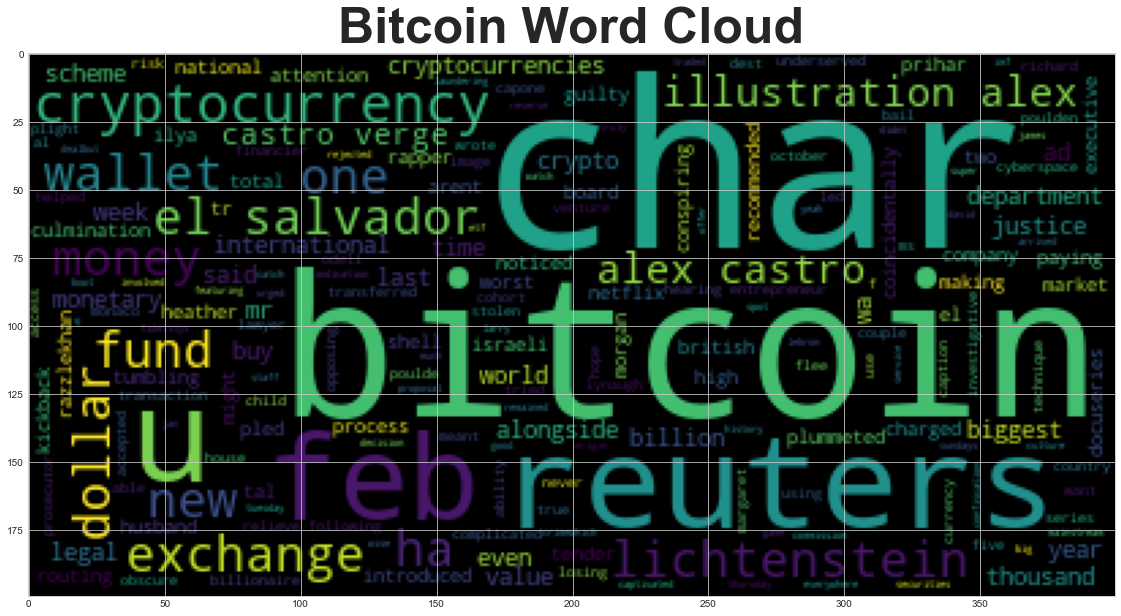

In [24]:
# Generate the Bitcoin word cloud
big_string = ' '.join(bitcoin_tokenized)
wc = WordCloud().generate(big_string)
plt.imshow(wc)
plt.title(label= 'Bitcoin Word Cloud', fontdict={'fontsize' :50, 'fontweight' : 'bold'})

Text(0.5, 1.0, 'Ethereum Word Cloud')

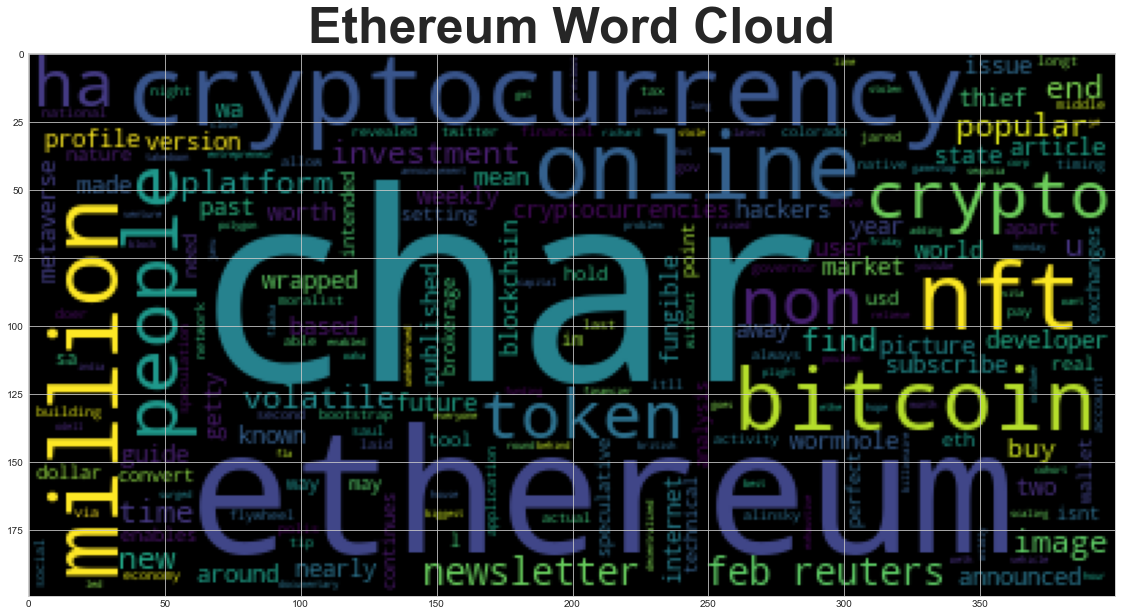

In [26]:
# Generate the Ethereum word cloud
big_string = ' '.join(ethereum_tokenized)
wc = WordCloud().generate(big_string)
plt.imshow(wc)
plt.title(label='Ethereum Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

3. Named Entity Recognition
In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [27]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

Bitcoin NER

In [29]:
# Concatenate all of the Bitcoin text together
# Already concatinated using ' '.join(bitcoin_df['text'])
bitcoin_text

'Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars] El Salvador introduced Bitcoin as a legal tender alongside the US dollar in 2021. | Illustration by Alex Castro / The Verge\r\n\n \n\n The International Monetary Fund’s executive board has recommended El … [+2691 chars] Israeli national Tal Prihar pled guilty to routing money from kickbacks through Bitcoin and shell companies \r\nIllustration by Alex Castro / The Verge\r\nIn the culmination of a two-year legal process, … [+1448 chars] Netflix\r\n is making a docuseries about one of the worst rappers of all time\r\n. Coincidentally, Heather "Razzlekhan" Morgan and her husband, Ilya Lichtenstein, were charged this week with conspiring t… [+1432 chars] British entrepreneur and financier Richard ODell Poulden hopes that his new venture will relieve the plight of an underserved 

In [30]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_text)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [31]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [32]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text, ent.label_)

last week DATE
3 MONEY
El Salvador GPE
US GPE
2021 DATE
Alex Castro PERSON
Verge ORG
The International Monetary Fund’s ORG
El ORG
Israeli NORP
Tal Prihar PERSON
Illustration ORG
Alex Castro PERSON
Verge ORG
two-year DATE
Netflix ORG
about one CARDINAL
Ilya Lichtenstein PERSON
this week DATE
British NORP
Richard ODell PERSON
house ORG
October DATE
Poulde GPE
the last five years DATE
about 25,000 CARDINAL
Lichtensteins PERSON
the Department of Justice ORG
Monaco PERSON
Al Capone LOC
Margaret Lynaugh PERSON
Bitcoin PERSON
El Salvador GPE
US GPE
The International Monetary Fund ORG
El Salvador GPE
Reuters ORG
Jan 26 DATE
Reuters ORG
The U.S. Securities and Exchange Commission ORG
Thursday DATE
ETF ORG
Fidelitys Wise Origin Bitcoin ORG
+202 GPE
Sundays Super Bowl ORG
Larry David PERSON
LeBron James PERSON
+3454 ORG
one CARDINAL
Tuesday DATE
$4.5 billion MONEY
Lichtensteins PERSON
Feb. 1 DATE
roughly $3.6 billion MONEY
one CARDINAL
2020 DATE
Feb 1 DATE
Reuters ORG
thousands CARDINAL
202 CARDI

Ethereum NER

In [33]:
# Concatenate all of the Ethereum text together
# Already concatinated using ' '.join(ethereum_df['text'])
ethereum_text

'If people who buy cryptocurrencies intended only to hold on to them as speculative investments, there\'d be no real need for crypto wallets. Exchanges and online brokerages that convert dollars to, sa… [+3031 chars] Technical analysis isnt a perfect tool, but it may point the way for Ethereum\r\nEthereum\xa0(ETH-USD\r\n) continues to be a volatile crypto investment. Crypto is volatile by nature Im not setting it apart … [+3612 chars] This enables an L1 platform to bootstrap its national economy over time through a flywheel between financial speculation around its native token and actual building of applications and activities in … [+4057 chars] The means-and-ends moralists, or non-doers, always end up on their ends\r\nwithout any means.\r\n-- Saul Alinsky People in Colorado will be able to pay their state taxes in cryptocurrency by the middle of this year, the US state\'s governor has revealed.\r\nGov. Jared Polis laid out the timing of the move, a longt… [+2206 chars] Last night, Twi

In [34]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_text)

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum NER"

In [35]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [36]:
# List all Entities
for ent in ethereum_doc.ents:
    print(ent.text, ent.label_)

Ethereum ORG
ETH-USD ORG
Crypto PERSON
-- Saul Alinsky People PERSON
Colorado GPE
the middle of this year DATE
US GPE
Jared Polis PERSON
Last night TIME
Twitter PRODUCT
Ethereum ORG
second ORDINAL
two months DATE
NFT ORG
Feb 7 DATE
Reuters ORG
Monday DATE
$450 million MONEY
Sequoia Capital India ORG
nearly $324 million MONEY
Getty Images PERSON
more than $324 million MONEY
Wormhole PERSON
120,000 CARDINAL
wEth ORG
Ethereum ORG
nearly $324 million MONEY
Getty Images PERSON
more than $324 million MONEY
Wormhole PERSON
over two hours TIME
YouTube ORG
Waka Flacka Fla ORG
British NORP
Richard ODell PERSON
house ORG
October DATE
Poulde GPE
Feb 4 DATE
Reuters ORG
8.82% PERCENT
40,611.4 MONEY
2202 DATE
Friday DATE
3,291.29 MONEY
Bitcoin PERSON
23.2% PERCENT
TIME ORG
weekly DATE
Vita ORG
TIME ORG
weekly DATE
Feb 3 DATE
Reuters ORG
NFT ORG
later this year DATE
Reuters ORG
Thursday DATE
UK GPE
Bitcoin PERSON
Brett Harrison PERSON
Bitcoin PERSON
today DATE
Fed ORG
2017 DATE
+5776 ORG
